# Titanic Survival Prediction
This notebook shows how to predict if a passenger survived the Titanic disaster.

The data is obtained through [Kaggle](https://www.kaggle.com/c/titanic/overview).

The goal is to show a real example of a Machine Learning/Data Science task and provide a basic guide on how to approach this type of problem.

## Import Libraries

In [1]:
import matplotlib.pyplot as plt  # Plotting
import numpy as np  # Array computation
import seaborn as sns  # Plotting 
import pandas as pd  # Handling table data
from IPython.display import display, clear_output  # Plotting

# Models
import sklearn.model_selection
import sklearn.linear_model
import sklearn.svm
import sklearn.ensemble

%matplotlib inline
sns.set_theme()

# Set random seed
np.random.seed(42)

## Problem Definition
Our task is to predict if a person survived the Titanic disaster based on some set of features. This is a _binary classification_ problem, where our target is 0 (did not survive) or 1 (survived).

## Data Analysis and Processing
This is usually the most important stage of a Machine Learning/Data Science problem.

The goal of this stage is to understand our data (analysis), correct possible problems (cleaning), and process it so it's easier to use (wrangling).

### Load and View Data
Our data is already split into a training and test set. Let's look at the training set only for now.

In [2]:
train_df = pd.read_csv("data\\train.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Our training dataset contains 891 passenger records and we have 12 columns per passenger.

Let's try to understand what these are.

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.0000,NaN,S
208,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.7500,NaN,Q
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S


Based on what we have just seen and the documentation, we can describe our columns:
* PassengerID: seems to be just a number indicating the current row, so it's not a feature
* Survived: 0 or 1 indicating if the passenger survived (this is our target!)
* Pclass: 1, 2 or 3. Indicates the class of the ticket (1st, 2nd, or 3rd class)
* Name: The name of the passenger
* Sex: The sex of the passenger
* Age: The age of the passenger. Note the value is float. Age can be less than one. When estimated, appears as xx.5
* SibSp: Number greater or equal to 0. Indicates number of siblings or spouses aboard
* Parch: Number greater or equal to 0. Indicates number of parents or children aboard
* Ticket: Alphanumeric. This is the raw ticket number
* Fare: Number greater or equal to 0. Indicates the fare paid by the passenger
* Cabin: Alphanumeric. Indicates the cabin number assigned to the passenger.
* Embarked: One of C (Cherbourg), Q (Queenstown), or S (Southampton). Indicates the port where the passenger embarked.

Just based on this description we can already have some ideas about the data and how the different features might help us make a prediction.

For example: 
* *Pclass* is indicator of social-economic status and it seems reasonable to expect people in 1st class have a higher chance of survival
* *Name* is hard to work with. We already have features regarding other family members on board. There might be extra information in the titles (e.g. Master, Captain, etc.) but for the purpose of this notebook let's ignore them
* *Sex* is potentially very relevant, due to the usual procedure of saving "women and children first" in this type of event
* *Age* is also probably very relevant
* *SibSp* and *Parch* both give information about the family members of a passenger. Perhaps it would make sense to join both into a single feature indicating family size
* *Ticket* is just a raw number. There is no guarantee that its value indicates anything that isn't already described by other features. Perhaps it's best to discard it
* *Fare* is probably very related with *Pclass* and *Embarked*
* *Embarked* doesn't seem to be directly relevant for survival rate

Note that the above discussion and assumptions should still be validated!

## Analise Data
Let's start by directly computing some metrics with Pandas.

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* About 38% of the passengers in the training set survived
* Most passengers are young (average age is 29, 75% have 38 or less) and we are missing the age of some (we have 714 out of 891)
* Most passengers travelled alone (average SibSp is 0.5 and 50% is 0; average Parch is 0.38 and 75% is 0)
* Fare has a wide range (min of 0 and max of 512). It is possible that the values of 0 are missing records but let's ignore that for now

Given this, it might make sense to bin the Age and Fare features. We will also want to complete the Age feature. PassengerId is irrelevant, so we should drop it.

In [6]:
train_df.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Olsson, Miss. Elina",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


* Each name is unique
* Most of the passengers are male
* There are duplicate ticket numbers (681 unique out of 891)
* There are duplicate cabin numbers (147 unique out of 204) and several missing values (only have 204 out of 891)
* Most passengers embarked in Southampton (664 out of 889) and we are missing the port for two passengers 

Given this, we might want to drop the Name, Ticket, and Cabin features. Also, we should complete the Embarked feature.

Just based on this analysis, we already have a long list of things to do with our data.

Before we do them, let's analise things a bit further and see if our previous assumptions are correct.

First, is *Pclass* a good indicator for survival? We expected people in first class to have a better surival rate than third class.

In [7]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


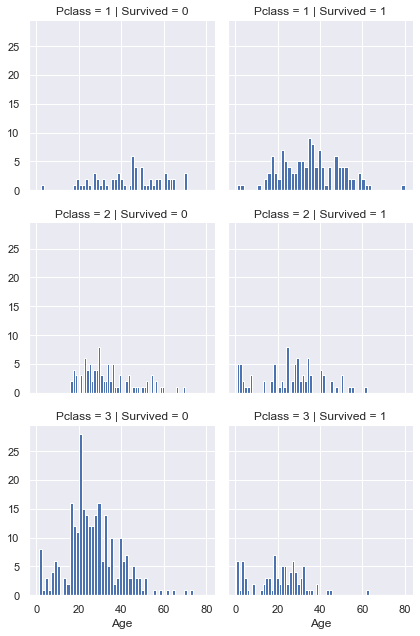

In [8]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', bins=50)

Our assumption seems to hold! This means that this is a good feature for us to keep.

We also assumed that female passengers have a higher survival chance.

In [9]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


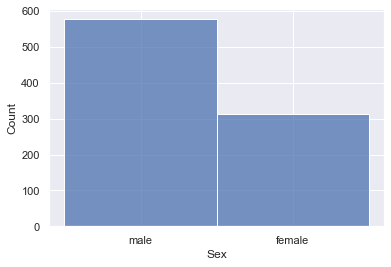

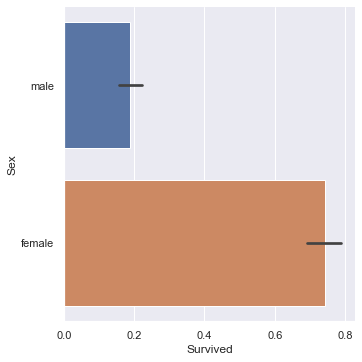

In [10]:
sns.histplot(train_df["Sex"])
sns.catplot(x="Survived", y="Sex", data=train_df, kind="bar")

This assumption also seems to hold! Let's keep this feature.

We also talked about merging the *SibSp* and *Parch* features. Let's look at the survival rates for these features.

In [11]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


While there is some relation to surival rate, there are same cases where the rate is directly zero. Moving forward we can merge these features into a family size feature and analise this again.

Now let's have a look at the *Age* feature.

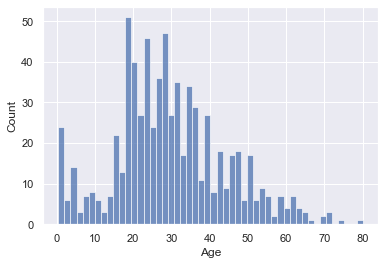

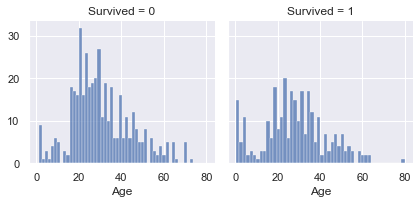

In [13]:
sns.histplot(train_df["Age"], bins=50)
sns.FacetGrid(train_df, col='Survived').map(sns.histplot, "Age", bins=50)

This is mostly in line with our assumptions. Some elderly survived and so did many children.

Now let's look at the Fare feature.

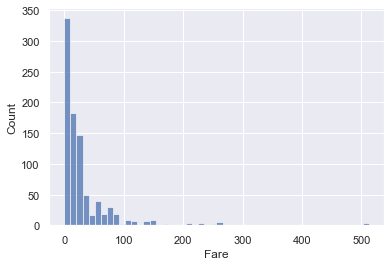

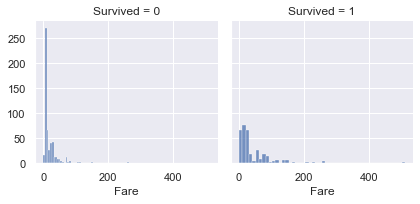

In [14]:
sns.histplot(train_df["Fare"], bins=50)
sns.FacetGrid(train_df, col='Survived').map(sns.histplot, "Fare", bins=50)

Fare has a very wide range so we should probably be mindful of that when binning.

Finally, let's look at the *Embarked* feature.

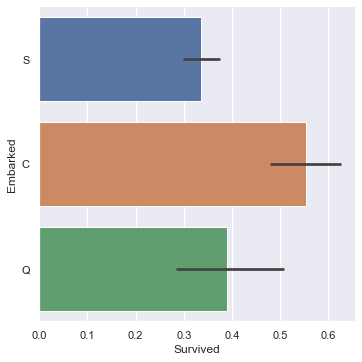

In [15]:
sns.catplot(x="Survived", y="Embarked", data=train_df, kind="bar")

Unsure if it's useful but let's keep it. We will want to change the labels to numbers.

We will finish the analysis section here but note that we mostly only checked each individual feature. We should also try to find correlations between the different features.

### Complete missing data
We identified that there is some missing data in our dataset, namely missing Age and Embarked.

Regarding Age, we can replace it with the overall median value. Note that if we found a correlation between Age and some other feature, then we could complete it in a different way.

Regarding Embarked, we can replace missing values with the most common value (mode).

In [16]:
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
train_df["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
train_df["Embarked"].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

Note that we should complete missing values in the test data as well. However, we must use the median and mode that we computed using the training set.

### Wrangle data
In this stage we will change the data:

* Drop PassengerId, Name, Ticket, and Cabin
* Bin *Age* and *Fare* features
* Merge *Sibsp* and *Parch* + pd pivot again
* Map *Sex* and *Embarked* features to numbers

In [18]:
train_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
train_df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
384,0,3,male,28.0,0,0,7.8958,S
210,0,3,male,24.0,0,0,7.0500,S
486,1,1,female,35.0,1,0,90.0000,S
425,0,3,male,28.0,0,0,7.2500,S
855,1,3,female,18.0,0,1,9.3500,S
109,1,3,female,28.0,1,0,24.1500,Q
790,0,3,male,28.0,0,0,7.7500,Q
438,0,1,male,64.0,1,4,263.0000,S
481,0,2,male,28.0,0,0,0.0000,S
452,0,1,male,30.0,0,0,27.7500,C


In [19]:
train_df["AgeBand"] = pd.to_numeric(pd.cut(train_df["Age"], bins=5, labels=[0, 1, 2, 4, 5]))  # Equal width bins
train_df.drop(["Age"], axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeBand
0,0,3,male,1,0,7.2500,S,1
1,1,1,female,1,0,71.2833,C,2
2,1,3,female,0,0,7.9250,S,1
3,1,1,female,1,0,53.1000,S,2
4,0,3,male,0,0,8.0500,S,2


In [20]:
train_df["FareBand"] = pd.to_numeric(pd.qcut(train_df["Fare"], q=5, labels=[0, 1, 2, 4, 5])) # 5 quantiles
train_df.drop(["Fare"], axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeBand,FareBand
0,0,3,male,1,0,S,1,0
1,1,1,female,1,0,C,2,5
2,1,3,female,0,0,S,1,1
3,1,1,female,1,0,S,2,5
4,0,3,male,0,0,S,2,1


In [21]:
train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1
train_df.drop(["SibSp", "Parch"], axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Sex,Embarked,AgeBand,FareBand,FamilySize
0,0,3,male,S,1,0,2
1,1,1,female,C,2,5,2
2,1,3,female,S,1,1,1
3,1,1,female,S,2,5,2
4,0,3,male,S,2,1,1


In [22]:
train_df[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [23]:
train_df["Embarked"] = train_df["Embarked"].map({"S": 0, "C": 1, "Q": 2})
train_df

,Survived,Pclass,Sex,Embarked,AgeBand,FareBand,FamilySize
0,0,3,male,0,1,0,2
1,1,1,female,1,2,5,2
2,1,3,female,0,1,1,1
3,1,1,female,0,2,5,2
4,0,3,male,0,2,1,1
...,...,...,...,...,...,...,...
886,0,2,male,0,1,2,1
887,1,1,female,0,1,4,1
888,0,3,female,0,1,4,4
889,1,1,male,1,1,4,1


In [24]:
train_df["Sex"] = train_df["Sex"].map({"male": 0, "female": 1})
train_df

,Survived,Pclass,Sex,Embarked,AgeBand,FareBand,FamilySize
0,0,3,0,0,1,0,2
1,1,1,1,1,2,5,2
2,1,3,1,0,1,1,1
3,1,1,1,0,2,5,2
4,0,3,0,0,2,1,1
...,...,...,...,...,...,...,...
886,0,2,0,0,1,2,1
887,1,1,1,0,1,4,1
888,0,3,1,0,1,4,4
889,1,1,0,1,1,4,1


We have now processed our data and are ready to use it! Before that, let's have a look at the correlations.

<AxesSubplot:>

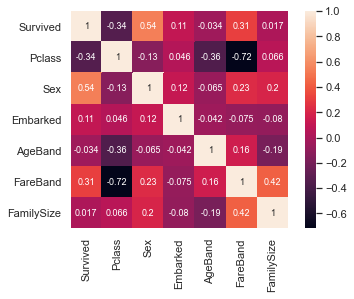

In [25]:
sns.heatmap(
        train_df.corr(), 
        square=True, 
        annot=True, 
        annot_kws={'fontsize': 9}
)

## Train Models
At this stage our data is ready to use for model training!

First step is to split the train data into training and validation:

In [26]:
train_df, val_df = sklearn.model_selection.train_test_split(train_df, train_size=0.75)

X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
X_val = val_df.drop("Survived", axis=1)
y_val = val_df["Survived"]

We can now try to train a model! Let's try Logistic Regression:

In [30]:
lr_classifier = sklearn.linear_model.LogisticRegression()
lr_classifier.fit(X_train, y_train)

lr_acc = lr_classifier.score(X_val, y_val)
print(f"Accuracy: {lr_acc * 100:.2f}%")

Accuracy: 79.82


The Accuracy is not bad.

Let's try a few different models:

In [31]:
svm_classifier = sklearn.svm.SVC()
svm_classifier.fit(X_train, y_train)
svm_acc = svm_classifier.score(X_val, y_val)
print(f"Accuracy: {svm_acc * 100:.2f}%")

Accuracy: 82.06


In [33]:
rf_classifier = sklearn.ensemble.RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)
rf_acc = rf_classifier.score(X_val, y_val)
print(f"Accuracy: {rf_acc * 100:.2f}%")

Accuracy: 82.96%


The Notebook ends here but here is a list of some things that are missing (not exhaustive):
* We need to clean and wrangle the test data in the same way
* We need to classify and submit the predictions of our best model on the test set
* We should more carefully analise the features and potentially create new features
* We should try different hyperparameters and models
* We should analise the errors our models are making